In [33]:
from fastai.tabular.all import *
from warnings import simplefilter
set_seed(42)
simplefilter(action="ignore", category=FutureWarning)

In [34]:
df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')
df.replace(to_replace='.', value=np.nan, inplace=True)
df.replace(regex='^[.;]+$', value=np.nan, inplace=True)
df.apply(pd.to_numeric, errors='ignore')
df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)

/tmp/ipykernel_18847/3683705928.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar.hg19.chr21.dbnsfp.tsv', sep='\t')


In [35]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df_data = df.drop(columns=['clinvar_clnsig'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df = df.sample(frac=1).reset_index(drop=True)

In [36]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [37]:
dls = to.dataloaders(bs=1024)

In [38]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=10))

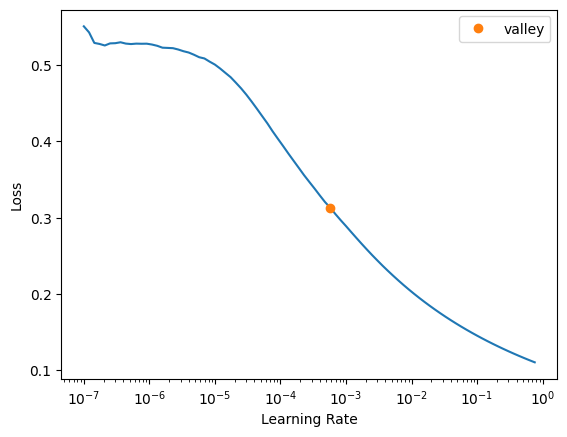

In [39]:
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.418991,0.170925,0.139591,00:00
1,0.263544,0.170033,0.102286,00:00
2,0.195303,0.168690,0.097473,00:00
3,0.154569,0.167252,0.097473,00:00
4,0.126431,0.165208,0.102286,00:00
5,0.105727,0.160283,0.137184,00:00
6,0.089770,0.150763,0.298436,00:00
7,0.076987,0.138381,0.466907,00:00
8,0.066743,0.126282,0.547533,00:00
9,0.058439,0.115860,0.601685,00:00


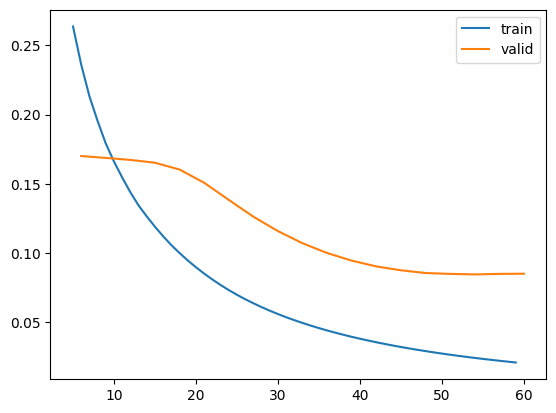

In [40]:
learn.fit(20, 1e-3, wd=0.01)
learn.recorder.plot_loss()

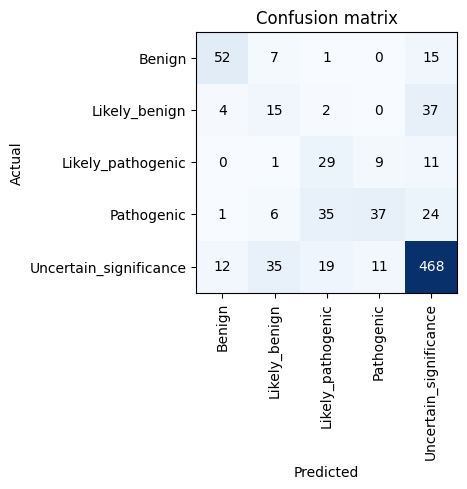

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [42]:
test_df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')
test_df.replace(to_replace='.', value=np.NaN, inplace=True)
test_df.replace(regex='^[.;]+$', value=np.NaN, inplace=True)
test_df.apply(pd.to_numeric, errors='ignore')
test_df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
test_df = test_df[df.columns]
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'not_provided'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'protective'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'drug_response'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'association'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Affects'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'other'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'drug_response,_risk_factor'].index, inplace=True)
test_df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Likely_benign,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Likely_benign,_drug_response,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_other,_risk_factor', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_risk_factor', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
test_dl = dls.test_dl(test_df)
learn.validate(dl=test_dl)

/tmp/ipykernel_18847/959944374.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')


In [ ]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=40, max_samples=3328,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
     


In [ ]:
xs,y = to.train.xs,to.train.y
m = rf(xs, y)

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
66,MetaRNN_rankscore,0.213905
65,MetaRNN_score,0.096446
116,clinvar_review,0.071154
68,M-CAP_score,0.046254
70,M-CAP_pred,0.036037
69,M-CAP_rankscore,0.030737
33,SIFT4G_score,0.024109
50,FATHMM_score,0.022063
35,SIFT4G_pred,0.018551
92,LIST-S2_score,0.017627


<Axes: ylabel='cols'>

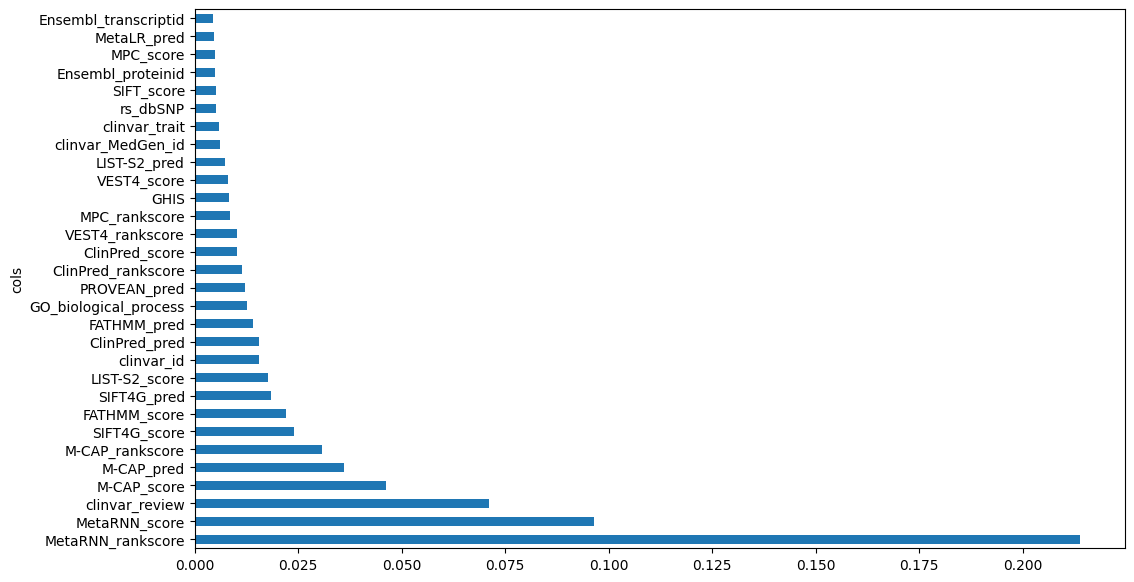

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])

In [ ]:
to_keep = fi[fi.imp>0.003].cols

In [ ]:
df_keep = df[to_keep].copy()
df_keep

,MetaRNN_rankscore,MetaRNN_score,clinvar_review,M-CAP_score,M-CAP_pred,M-CAP_rankscore,SIFT4G_score,FATHMM_score,SIFT4G_pred,LIST-S2_score,...,Orphanet_disorder,aapos,HGVSp_ANNOVAR,LIST-S2_rankscore,MetaLR_score,CCDS_id,phyloP30way_mammalian,BayesDel_addAF_rankscore,DANN_score,PROVEAN_converted_rankscore
0,0.01215,0.030850738,"criteria_provided,_single_submitter",0.15688,D,0.83757,0.481,-1.65,T,0.90321,...,"Bethlem myopathy;Myosclerosis;Congenital muscular dystrophy, Ullrich type",891,p.A891T,0.66112,0.4689,CCDS13728;CCDS13729;CCDS13730,1.142,0.30861,0.966657,0.28290
1,0.97177,0.97459894;0.97459894;0.97459894;0.97459894,no_assertion_criteria_provided,0.401971,D,0.93417,0.0;0.0;0.0;0.0,0.46;0.46;0.46;0.46,D;D;D;D,.;0.962704;0.949105;0.960204,...,Total early-onset cataract,391;391;311;380,p.F391S;p.F391S;p.F311S;p.F380S,0.86103,0.4910,CCDS13733;CCDS46654;CCDS54489,1.264,0.85815,0.998230,0.95424
2,0.92263,0.929211;0.929211,"criteria_provided,_single_submitter",0.258675,D,0.89417,0.014;0.012,-6.21;-6.21,D;D,0.959104;0.945305,...,Amyotrophic lateral sclerosis,110;91,p.D110Y;p.D91Y,0.84591,0.9624,CCDS33536,1.176,0.73023,0.837265,0.59873
3,0.01094,0.029674202;0.029674202;0.029674202,"criteria_provided,_single_submitter",0.063414,D,0.68959,0.597;0.568;0.585,0.25;0.25;0.25,T;T;T,0.805419;0.789521;0.756024,...,Knobloch syndrome,378;558;793,p.A378T;p.A558T;p.A793T,0.45334,0.0955,CCDS42971;CCDS42972;CCDS77643,-0.715,0.13456,0.647122,0.20358
4,0.00709,0.025013506,no_assertion_criteria_provided,0.003447,T,0.07786,0.45,1.9,T,0.584142,...,NaN,977,p.S977G,0.21248,0.0273,CCDS13704,0.314,0.04042,0.970157,0.30555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,0.84097,0.84923613;0.84923613;0.84923613;0.84923613,"criteria_provided,_single_submitter",0.441223,D,0.94169,0.005;0.006;0.006;0.006,-1.18;-1.18;-1.18;-1.18,D;D;D;D,0.985101;0.987934;.;0.986701,...,"Bethlem myopathy;Myosclerosis;Congenital muscular dystrophy, Ullrich type",698;698;698;698,p.A698V;p.A698V;p.A698V;p.A698V,0.95926,0.6098,CCDS13728;CCDS13729;CCDS13730,1.000,0.7449,0.996036,0.69593
4155,0.81811,0.82632196;0.82632196;0.82632196;0.82632196;0.82632196;0.82632196,"criteria_provided,_single_submitter",0.069424,D,0.70725,0.011;0.01;0.006;0.009;0.006;.,0.46;0.46;.;0.46;0.46;0.46,D;D;D;D;D;.,0.89721;0.891311;0.89801;0.949205;0.927707;0.978002,...,Atypical juvenile parkinsonism;Undetermined early-onset epileptic encephalopathy,184;184;184;223;223;184,p.C184S;p.C184S;p.C184S;p.C223S;p.C223S;.,0.92190,0.3041,CCDS33539;CCDS33540;CCDS54483;CCDS54484,1.312,0.77234,0.978162,0.97599
4156,0.72160,0.69622236;0.69622236,"criteria_provided,_conflicting_interpretations",0.199223,D,0.86640,0.007;0.007,-1.75;.,D;D,0.822818;0.822818,...,"Bethlem myopathy;Congenital muscular dystrophy, Ullrich type",958;956,p.A958D;p.A956D,0.48291,0.6310,CCDS13727,0.940,0.50225,0.997626,0.67241
4157,0.42927,0.25535625,"criteria_provided,_single_submitter",0.056401,D,0.66592,0.001,1.46,D,0.839916,...,Seckel syndrome;Microcephalic osteodysplastic primordial dwarfism type II,288,p.R288C,0.51465,0.1562,CCDS33592,0.997,0.32892,0.999180,0.80340


In [ ]:
num_cols = df_keep.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_keep.select_dtypes(include=[object]).columns.tolist()
df = pd.concat([df['clinvar_clnsig'], df_keep], axis=1)
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df['clinvar_clnsig'].value_counts()

clinvar_clnsig
Uncertain_significance    2700
Pathogenic                 530
Benign                     382
Likely_benign              274
Likely_pathogenic          273
Name: count, dtype: int64

In [ ]:
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='clinvar_clnsig',
                    y_block=CategoryBlock(),
                   splits=splits)

In [ ]:
dls = to.dataloaders(bs=1024)

In [ ]:
dls.show_batch()

,MetaRNN_rankscore,MetaRNN_score,clinvar_review,M-CAP_score,M-CAP_pred,M-CAP_rankscore,SIFT4G_score,FATHMM_score,SIFT4G_pred,LIST-S2_score,clinvar_id,ClinPred_pred,FATHMM_pred,GO_biological_process,PROVEAN_pred,ClinPred_rankscore,ClinPred_score,VEST4_rankscore,MPC_rankscore,GHIS,VEST4_score,LIST-S2_pred,clinvar_MedGen_id,clinvar_trait,rs_dbSNP,SIFT_score,Ensembl_proteinid,MPC_score,MetaLR_pred,Ensembl_transcriptid,DEOGEN2_rankscore,MutationTaster_AAE,PROVEAN_score,LRT_Omega,Orphanet_disorder,aapos,HGVSp_ANNOVAR,LIST-S2_rankscore,MetaLR_score,CCDS_id,BayesDel_addAF_rankscore,PROVEAN_converted_rankscore,phyloP100way_vertebrate,phyloP30way_mammalian,DANN_score,clinvar_clnsig
0,#na#,#na#,"criteria_provided,_multiple_submitters,_no_conflicts",#na#,#na#,#na#,#na#,#na#,#na#,#na#,286179,#na#,#na#,osteoblast differentiation;growth plate cartilage chondrocyte morphogenesis;cell adhesion;extracellular matrix organization;endodermal cell differentiation;protein heterotrimerization;cellular response to amino acid stimulus,#na#,#na#,#na#,#na#,#na#,0.63792,#na#,#na#,CN029274|CN517202,Bethlem_myopathy_1|not_provided,rs886043330,#na#,ENSP00000355180;ENSP00000483630,#na#,#na#,ENST00000361866;ENST00000612273,#na#,#na#,#na#,#na#,"Bethlem myopathy;Congenital muscular dystrophy, Ullrich type",-1;-1,#na#,#na#,#na#,CCDS13727,0.99412,#na#,4.480,1.077,0.994825,Pathogenic
1,0.00086,0.004279703;0.004279703,"criteria_provided,_single_submitter",0.028147,D,0.50866,0.42;0.662,1.54;1.54,T;T,0.534647;0.534647,218803,T,T;T,angiogenesis;endothelial cell morphogenesis;cell adhesion;visual perception;positive regulation of cell population proliferation;negative regulation of cell population proliferation;animal organ morphogenesis;extracellular matrix organization;positive regulation of cell migration;response to drug;response to hydrostatic pressure;positive regulation of endothelial cell apoptotic process,N;N,0.00026,0.00253587578120646,0.13198,0.07511,0.491281224,0.135;0.106,T;T,CN169374,not_specified,rs62000960,0.193;0.161,ENSP00000347665;ENSP00000352798,0.0671947334163;.,T,ENST00000355480;ENST00000359759,0.31612,G173S;G173S;.,-1.3;-1.33,2.749370,Knobloch syndrome,173;173,p.G173S;p.G173S,0.17878,0.0608,CCDS42971;CCDS42972;CCDS77643,0.00098,0.33197,-1.607,-0.262,0.413474,Uncertain_significance
2,0.71715,0.6885923;0.6885923;0.6885923;0.6885923,"criteria_provided,_conflicting_interpretations",0.169307,D,0.84717,0.478;0.337;0.337;0.397,-1.01;-1.01;-1.01;-1.01,T;T;T;T,0.965803;0.967503;.;0.967253,285726,T,T;T;T;T,growth plate cartilage chondrocyte morphogenesis;cell adhesion;response to glucose;extracellular matrix organization;protein heterotrimerization,N;N;N;N,0.31179,0.460398405790329,0.79986,0.58019,0.604099,0.804;0.776;0.775;0.8,D;D;.;D,CN029274|CN117976|CN517202,Bethlem_myopathy_1|Collagen_VI-related_myopathy|not_provided,rs377376395,0.334;0.351;0.351;0.354,ENSP00000300527;ENSP00000312529;ENSP00000387115;ENSP00000380870,0.645836694259;.;.;.,T,ENST00000300527;ENST00000310645;ENST00000409416;ENST00000397763,0.56120,E695K;E695K;E695K;E695K;E695K,-0.76;-0.73;-0.73;-0.73,0.052830,"Bethlem myopathy;Myosclerosis;Congenital muscular dystrophy, Ullrich type",695;695;695;695,p.E695K;p.E695K;p.E695K;p.E695K,0.88224,0.4706,CCDS13728;CCDS13729;CCDS13730,0.58591,0.21215,7.958,1.146,0.998239,Uncertain_significance
3,0.99798,0.9926197;0.9926197;0.9926197;0.9926197,"criteria_provided,_single_submitter",0.353099,D,0.92320,0.024;0.024;0.024;0.024,-3.37;-3.37;-3.37;-3.37,D;D;D;D,.;.;.;0.916808,551308,D,D;D;D;D,cysteine biosynthetic process from serine;L-serine metabolic process;L-serine catabolic process;cysteine biosynthetic process via cystathionine;cysteine biosynthetic process;transsulfuration;L-cysteine catabolic process;DNA protection;homocysteine catabolic process;homocysteine metabolic process;oxidation-reduction process;hydrogen sulfide biosynthetic process,D;D;D;D,0.75197,0.983585000038147,0.92901,0.69068,0.549001307,0.925;0.924;0.923;0.923,.;.;.;D,C0751202,Classic_h

In [ ]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=3))

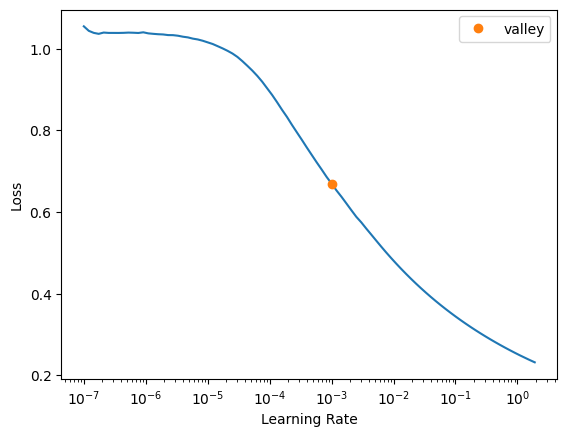

In [ ]:
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.000205,0.357979,0.750903,00:00
1,0.000193,0.358548,0.753309,00:00
2,0.000191,0.360120,0.752106,00:00
3,0.000191,0.361776,0.750903,00:00
4,0.000185,0.362471,0.750903,00:00
5,0.000180,0.362065,0.752106,00:00
6,0.000178,0.363627,0.750903,00:00
7,0.000174,0.362696,0.752106,00:00
8,0.000171,0.363399,0.752106,00:00
9,0.000168,0.365074,0.750903,00:00


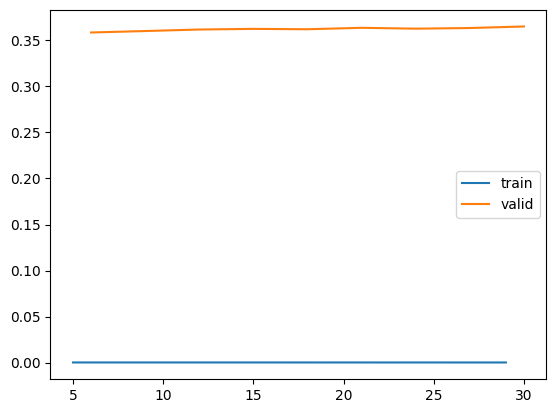

In [ ]:
learn.fit(20, lr, wd=0.01)
learn.recorder.plot_loss()

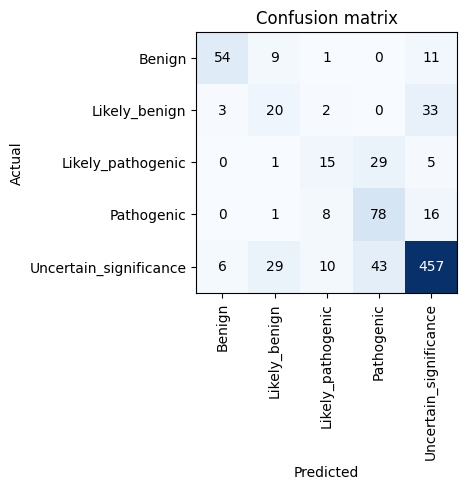

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
test_df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')
test_df.replace(to_replace='.', value=np.NaN, inplace=True)
test_df.replace(regex='^[.;]+$', value=np.NaN, inplace=True)
test_df.apply(pd.to_numeric, errors='ignore')
test_df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
test_df = test_df[df.columns]
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'not_provided'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'protective'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'drug_response'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'association'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'Affects'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'other'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.clinvar_clnsig == 'drug_response,_risk_factor'].index, inplace=True)
test_df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Likely_benign,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Likely_benign,_drug_response,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_other,_risk_factor', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_risk_factor', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
test_dl = dls.test_dl(test_df)
learn.validate(dl=test_dl)



/tmp/ipykernel_18847/2820366060.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')


(#2) [0.5541560649871826,0.5704477429389954]

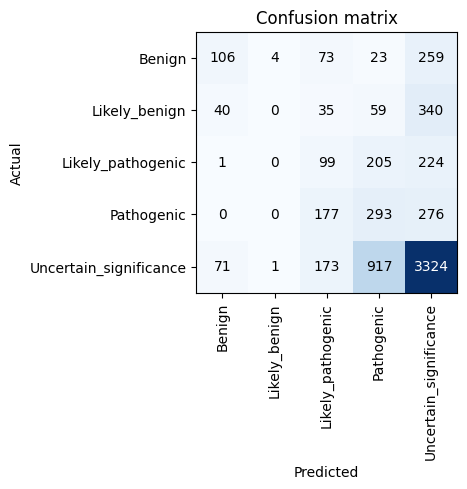

In [ ]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()